In [25]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow.python.framework import ops
#from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
tr = '../Data/train.csv'
ts = '../Data/test.csv'
train_set = pd.read_csv(tr)
test_set  = pd.read_csv(ts)

# print ('Training set')
# print (train_set.head())
# print ('\nTest set')
# print (test_set.head())
# print ('\nOriginal DataFrame')
# print (data.head())

print(train_set.shape,test_set.shape)

(14960, 127) (5040, 127)


In [3]:
X_train = train_set.iloc[:,:93]
Y_train = train_set.iloc[:,93:]

X_test  = test_set.iloc[:,:93]
Y_test  = test_set.iloc[:,93:]

In [6]:
# Explore your dataset 
# X_train = X_train.T
# Y_train = Y_train.T
# X_test  = X_test.T
# Y_test  = Y_test.T

m_train = X_train.shape[1] #no of train samples
n       = X_train.shape[0] #no of train features
m_test  = Y_test.shape[1] #no of test samples

print ("train_set shape            : " + str(train_set.shape))
print ("test_set shape             : " + str(test_set.shape))
print ("Number of training examples: " + str(m_train))
print ("Number of testing examples : " + str(m_test))
print ("\n********************************************\n")
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))
#print(Y_test.head(5))

train_set shape            : (14960, 127)
test_set shape             : (5040, 127)
Number of training examples: 14960
Number of testing examples : 5040

********************************************

X_train shape: (93, 14960)
Y_train shape: (34, 14960)
X_test shape: (93, 5040)
Y_test shape: (34, 5040)


In [7]:
# Normalising the marks columns (1-9)
myu = [77.0187165775401, 76.95347593582888, 77.03683155080213, 77.11737967914439, 76.94017379679144, 76.98877005347593, 77.07640374331551, 76.91136363636363, 76.93155080213904, 7.981483957219251, 5.002272727272727, 2.973663101604278, 5.01096256684492, 5.0034090909090905]
sig = [10.073421086091772, 10.098954279959996, 10.152025460548993, 10.110268046569738, 10.013252317634432, 10.182505039307635, 10.09926555837586, 10.159344373807292, 10.102310732331906, 2.588598147147264, 2.581461399912868, 2.006934020051923, 2.5768773650054673, 2.5781303709076844]


In [8]:
# GRADED FUNCTION: create_placeholders
#print(X_train.head())
def create_placeholders(n_x, n_y):
    """
    Creates the placeholders for the tensorflow session.
    
    Arguments:
    n_x -- scalar, no of features (93)
    n_y -- scalar, number of classes (34)
    
    Returns:
    X -- placeholder for the data input, of shape [n_x, None] and dtype "float"
    Y -- placeholder for the input labels, of shape [n_y, None] and dtype "float"
    
    Tips:
    - You will use None because it let's us be flexible on the number of examples you will for the placeholders.
      In fact, the number of examples during test/train is different.
    """

    ### START CODE HERE ### (approx. 2 lines)
    X = tf.placeholder(dtype = "float32" , shape = (n_x,None) , name="X")
    Y = tf.placeholder(dtype = "float32" , shape = (n_y,None) , name="Y")
    ### END CODE HERE ###
    
    return X, Y

In [8]:
#Tesing
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y:0", shape=(6, ?), dtype=float32)


In [9]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [50, 93]
                        b1 : [50, 1]
                        W2 : [45, 50]
                        b2 : [45, 1]
                        W3 : [40, 45]
                        b3 : [40, 1]
                        W4 : [38, 40]
                        b4 : [38, 1]
                        W5 : [36, 38]
                        b5 : [36, 1]
                        W6 : [34, 36]
                        b6 : [34, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    
    tf.set_random_seed(1)                   # so that your "random" numbers match ours
        
    ### START CODE HERE ### (approx. 6 lines of code)
    W1 = tf.get_variable("W1", [100, 93], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [100, 1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [100, 1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [100, 1], initializer = tf.zeros_initializer())
    W4 = tf.get_variable("W4", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b4 = tf.get_variable("b4", [100, 1], initializer = tf.zeros_initializer())
    W5 = tf.get_variable("W5", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b5 = tf.get_variable("b5", [100, 1], initializer = tf.zeros_initializer())
    W6 = tf.get_variable("W6", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b6 = tf.get_variable("b6", [100, 1], initializer = tf.zeros_initializer())
    W7 = tf.get_variable("W7", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b7 = tf.get_variable("b7", [100, 1], initializer = tf.zeros_initializer())
    W8 = tf.get_variable("W8", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b8 = tf.get_variable("b8", [100, 1], initializer = tf.zeros_initializer())
    W9 = tf.get_variable("W9", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b9 = tf.get_variable("b9", [100, 1], initializer = tf.zeros_initializer())
    W10 = tf.get_variable("W10", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b10 = tf.get_variable("b10", [100, 1], initializer = tf.zeros_initializer())
    W11 = tf.get_variable("W11", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b11 = tf.get_variable("b11", [100, 1], initializer = tf.zeros_initializer())
    W12 = tf.get_variable("W12", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b12 = tf.get_variable("b12", [100, 1], initializer = tf.zeros_initializer())
    W13 = tf.get_variable("W13", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b13 = tf.get_variable("b13", [100, 1], initializer = tf.zeros_initializer())
    W14 = tf.get_variable("W14", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b14 = tf.get_variable("b14", [100, 1], initializer = tf.zeros_initializer())
    W15 = tf.get_variable("W15", [34, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b15 = tf.get_variable("b15", [34, 1], initializer = tf.zeros_initializer())
#     W16 = tf.get_variable("W16", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b16 = tf.get_variable("b16", [100, 1], initializer = tf.zeros_initializer())
#     W17 = tf.get_variable("W17", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b17 = tf.get_variable("b17", [100, 1], initializer = tf.zeros_initializer())
#     W18 = tf.get_variable("W18", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b18 = tf.get_variable("b18", [100, 1], initializer = tf.zeros_initializer())
#     W19 = tf.get_variable("W19", [100, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b19 = tf.get_variable("b19", [100, 1], initializer = tf.zeros_initializer())
#     W20 = tf.get_variable("W20", [34, 100], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b20 = tf.get_variable("b20", [34, 1], initializer = tf.zeros_initializer())
#     W21 = tf.get_variable("W21", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b21 = tf.get_variable("b21", [40, 1], initializer = tf.zeros_initializer())
#     W22 = tf.get_variable("W22", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b22 = tf.get_variable("b22", [40, 1], initializer = tf.zeros_initializer())
#     W23 = tf.get_variable("W23", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b23 = tf.get_variable("b23", [40, 1], initializer = tf.zeros_initializer())
#     W24 = tf.get_variable("W24", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b24 = tf.get_variable("b24", [40, 1], initializer = tf.zeros_initializer())
#     W25 = tf.get_variable("W25", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b25 = tf.get_variable("b25", [40, 1], initializer = tf.zeros_initializer())
#     W26 = tf.get_variable("W26", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b26 = tf.get_variable("b26", [40, 1], initializer = tf.zeros_initializer())
#     W27 = tf.get_variable("W27", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b27 = tf.get_variable("b27", [40, 1], initializer = tf.zeros_initializer())
#     W28 = tf.get_variable("W28", [40, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b28 = tf.get_variable("b28", [40, 1], initializer = tf.zeros_initializer())
#     W29 = tf.get_variable("W29", [38, 40], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b29 = tf.get_variable("b29", [38, 1], initializer = tf.zeros_initializer())
#     W30 = tf.get_variable("W30", [36, 38], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b30 = tf.get_variable("b30", [36, 1], initializer = tf.zeros_initializer())
#     W31 = tf.get_variable("W31", [34, 36], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
#     b31 = tf.get_variable("b31", [34, 1], initializer = tf.zeros_initializer())
    
    ### END CODE HERE ###

    parameters = {"W1": W1,"b1": b1,"W2": W2,"b2": b2,"W3": W3,"b3": b3,"W4": W4,"b4": b4,
                  "W5": W5,"b5": b5,"W6": W6,"b6": b6,"W7": W7,"b7": b7,"W8": W8,"b8": b8,
                  "W9": W9,"b9": b9,"W10": W10,"b10": b10,"W11": W11,"b11": b11,"W12": W12,"b12": b12,
                  "W13":W13,"b13":b13,"W14": W14,"b14": b14,"W15": W15,"b15": b15,
#                   "W16": W16,"b16": b16,
#                   "W17":W17,"b17":b17,"W18": W18,"b18": b18,"W19": W19,"b19": b19,"W20": W20,"b20": b20,
#                   "W21":W21,"b21":b21,"W22":W22,"b22":b22,"W23":W23,"b23":b23,"W24":W24,"b24":b24,
#                   "W25":W25,"b25":b25,"W26":W26,"b26":b26,"W27":W27,"b27":b27,"W28":W28,"b28":b28,
#                   "W29":W29,"b29":b29,"W30":W30,"b30":b30,"W31":W31,"b31":b31
#                  
                 }
    
    return parameters

In [41]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W19 = " + str(parameters["W19"]))
    print("b19 = " + str(parameters["b19"]))
    print("W20 = " + str(parameters["W20"]))
    print("b20 = " + str(parameters["b20"]))
#     print("W3 = " + str(parameters["W3"]))
#     print("b3 = " + str(parameters["b3"]))
#     print("W4 = " + str(parameters["W4"]))
#     print("b4 = " + str(parameters["b4"]))

KeyError: 'W19'

In [10]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    W5 = parameters['W5']
    b5 = parameters['b5']
    W6 = parameters['W6']
    b6 = parameters['b6']
    W7 = parameters['W7']
    b7 = parameters['b7']
    W8 = parameters['W8']
    b8 = parameters['b8']
    W9 = parameters['W9']
    b9 = parameters['b9']
    W10 = parameters['W10']
    b10 = parameters['b10']
    W11 = parameters['W11']
    b11 = parameters['b11']
    W12 = parameters['W12']
    b12 = parameters['b12']
    W13 = parameters['W13']
    b13 = parameters['b13']
    W14 = parameters['W14']
    b14 = parameters['b14']
    W15 = parameters['W15']
    b15 = parameters['b15']
#     W16 = parameters['W16']
#     b16 = parameters['b16']
#     W17 = parameters['W17']
#     b17 = parameters['b17']
#     W18 = parameters['W18']
#     b18 = parameters['b18']
#     W19 = parameters['W19']
#     b19 = parameters['b19']
#     W20 = parameters['W20']
#     b20 = parameters['b20']
#     W21 = parameters['W21']
#     b21 = parameters['b21']
#     W22 = parameters['W22']
#     b22 = parameters['b22']
#     W23 = parameters['W23']
#     b23 = parameters['b23']
#     W24 = parameters['W24']
#     b24 = parameters['b24']
#     W25 = parameters['W25']
#     b25 = parameters['b25']
#     W26 = parameters['W26']
#     b26 = parameters['b26']
#     W27 = parameters['W27']
#     b27 = parameters['b27']
#     W28 = parameters['W28']
#     b28 = parameters['b28']
#     W29 = parameters['W29']
#     b29 = parameters['b29']
#     W30 = parameters['W30']
#     b30 = parameters['b30']
#     W31 = parameters['W31']
#     b31 = parameters['b31']
    
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                       # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2),b3)                       # Z3 = np.dot(W3,a2) + b3
    A3 = tf.nn.relu(Z3)                                    # A3 = relu(Z3)
    Z4 = tf.add(tf.matmul(W4,A3),b4)                       # Z4 = np.dot(W4,a3) + b4
    A4 = tf.nn.relu(Z4)                                    # A4 = relu(Z4)
    Z5 = tf.add(tf.matmul(W5,A4),b5)                       # Z5 = np.dot(W5,a4) + b5
    A5 = tf.nn.relu(Z5)                                    # A5 = relu(Z5)
    Z6 = tf.add(tf.matmul(W6,A5),b6)                       # Z6 = np.dot(W6,a5) + b6
    A6 = tf.nn.relu(Z6)                                    # A5 = relu(Z5)
    Z7 = tf.add(tf.matmul(W7,A6),b7)                       # Z6 = np.dot(W6,a5) + b6
    A7 = tf.nn.relu(Z7)                                    # A5 = relu(Z5)
    Z8 = tf.add(tf.matmul(W8,A7),b8)                       # Z6 = np.dot(W6,a5) + b6
    A8 = tf.nn.relu(Z8)                                    # A5 = relu(Z5)
    Z9 = tf.add(tf.matmul(W9,A8),b9)
    A9 = tf.nn.relu(Z9)                                    # A5 = relu(Z5)
    Z10 = tf.add(tf.matmul(W10,A9),b10)
    A10 = tf.nn.relu(Z10)                                    # A5 = relu(Z5)
    Z11 = tf.add(tf.matmul(W11,A10),b11)
    A11 = tf.nn.relu(Z11)                                    # A5 = relu(Z5)
    Z12 = tf.add(tf.matmul(W12,A11),b12)
    A12 = tf.nn.relu(Z12)                                    # A5 = relu(Z5)
    Z13 = tf.add(tf.matmul(W13,A12),b13)
    A13 = tf.nn.relu(Z13)                                    # A5 = relu(Z5)
    Z14 = tf.add(tf.matmul(W14,A13),b14)
    A14 = tf.nn.relu(Z14)                                    # A5 = relu(Z5)
    Z15 = tf.add(tf.matmul(W15,A14),b15)
#     A15 = tf.nn.relu(Z15)                                    # A5 = relu(Z5)
#     Z16 = tf.add(tf.matmul(W16,A15),b16)
#     A16 = tf.nn.relu(Z16)                                    # A5 = relu(Z5)
#     Z17 = tf.add(tf.matmul(W17,A16),b17)
#     A17 = tf.nn.relu(Z17)                                    # A5 = relu(Z5)
#     Z18 = tf.add(tf.matmul(W18,A17),b18)
#     A18 = tf.nn.relu(Z18)                                    # A5 = relu(Z5)
#     Z19 = tf.add(tf.matmul(W19,A18),b19)
#     A19 = tf.nn.relu(Z19)
#     Z20 = tf.add(tf.matmul(W20,A19),b20)
#     A20 = tf.nn.relu(Z20)                                    # A5 = relu(Z5)
#     Z21 = tf.add(tf.matmul(W21,A20),b21)
#     A21 = tf.nn.relu(Z21)                                    # A5 = relu(Z5)
#     Z22 = tf.add(tf.matmul(W22,A21),b22)
#     A22 = tf.nn.relu(Z22)
#     Z23 = tf.add(tf.matmul(W23,A22),b23)
#     A23 = tf.nn.relu(Z23)                                    # A5 = relu(Z5)
#     Z24 = tf.add(tf.matmul(W24,A23),b24)
#     A24 = tf.nn.relu(Z24)                                    # A5 = relu(Z5)
#     Z25 = tf.add(tf.matmul(W25,A24),b25)
#     A25 = tf.nn.relu(Z25)                                    # A5 = relu(Z5)
#     Z26 = tf.add(tf.matmul(W26,A25),b26)
#     A26 = tf.nn.relu(Z26)                                    # A5 = relu(Z5)
#     Z27 = tf.add(tf.matmul(W27,A26),b27)
#     A27 = tf.nn.relu(Z27)                                    # A5 = relu(Z5)
#     Z28 = tf.add(tf.matmul(W28,A27),b28)
#     A28 = tf.nn.relu(Z28)                                    # A5 = relu(Z5)
#     Z29 = tf.add(tf.matmul(W29,A28),b29)
#     A29 = tf.nn.relu(Z29)                                    # A5 = relu(Z5)
#     Z30 = tf.add(tf.matmul(W30,A29),b30)
#     A30 = tf.nn.relu(Z30)                                    # A5 = relu(Z5)
#     Z31 = tf.add(tf.matmul(W31,A30),b31)
#     ### END CODE HERE ###
    
    return Z15

In [12]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(93, 34)
    parameters = initialize_parameters()
    Z12 = forward_propagation(X, parameters)
    print("Z12 = " + str(Z12))

Z12 = Tensor("Add_19:0", shape=(34, ?), dtype=float32)


In [26]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z31, Y):
    """
    Computes the cost
    
    Arguments:
    Z4 -- output of forward propagation (output of the last LINEAR unit), of shape (34, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z4
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z31)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)...
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels = labels))

    ### END CODE HERE ###
    
    return cost

In [14]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(93, 34)
    parameters = initialize_parameters()
    Z31 = forward_propagation(X, parameters)
    cost = compute_cost(Z31, Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [12]:
# GRADED FUNCTION: random_mini_batches

def random_mini_batches(X, Y, mini_batch_size = 512, seed = 0):
    """
    Creates a list of random minibatches from (X, Y)
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (1, number of examples)
    mini_batch_size -- size of the mini-batches, integer
    
    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """
    
    np.random.seed(seed)            # To make your "random" minibatches the same as ours
    m = X.shape[1]                  # number of training examples
    mini_batches = []
    k = 0
        
    # Step 1: Shuffle (X, Y)
    permutation = list(np.random.permutation(m))
    shuffled_X = X.iloc[:, permutation]
    shuffled_Y = Y.iloc[:, permutation]
#.reshape((1,m))
    # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
    num_complete_minibatches = math.floor(m/mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X.iloc[:, k*mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_Y = shuffled_Y.iloc[:, k*mini_batch_size : (k+1) * mini_batch_size]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    # Handling the end case (last mini-batch < mini_batch_size)
    if m % mini_batch_size != 0:
        ### START CODE HERE ### (approx. 2 lines)
        mini_batch_X = shuffled_X.iloc[:, (k+1)*mini_batch_size :  ]
        mini_batch_Y = shuffled_Y.iloc[:, (k+1)*mini_batch_size :  ]
        ### END CODE HERE ###
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    return mini_batches

In [13]:
# X_train = X_train.T
# Y_train = Y_train.T
# X_test  = X_test.T
# Y_test  = Y_test.T
print(X_train.shape)
print(Y_train.shape)

(93, 14960)
(34, 14960)


In [31]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0005,
          num_epochs = 1500, minibatch_size = 512, print_cost = True):
    """
    Implements a four-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 93, number of training examples = 16129)
    Y_train -- test set, of shape (output size = 34, number of training examples = 16129)
    X_test -- training set, of shape (input size = 93, number of training examples = 3871)
    Y_test -- test set, of shape (output size = 34, number of test examples = 3871)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(0)                             # to keep consistent results
    seed = 2                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    ### START CODE HERE ### (1 line)
    X, Y = tf.placeholder(dtype = "float32", shape=(n_x, None) , name="X"), tf.placeholder(dtype = "float32", shape=(n_y,None) , name="Y")
    ### END CODE HERE ###

    # Initialize parameters
    ### START CODE HERE ### (1 line)
    parameters = initialize_parameters()
    ### END CODE HERE ###
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    ### START CODE HERE ### (1 line)
    #print("here ",X.shape)
    Z15 = forward_propagation(X, parameters)
    ### END CODE HERE ###
    
    # Cost function: Add cost function to tensorflow graph
    ### START CODE HERE ### (1 line)
    cost = compute_cost(Z15, Y)
    ### END CODE HERE ###
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    ### START CODE HERE ### (1 line)
    optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    ### END CODE HERE ###
    
    # Initialize all the variables
    init = tf.global_variables_initializer()

    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):

            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

            for minibatch in minibatches:

                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                ### START CODE HERE ### (1 line)
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                ### END CODE HERE ###
                
                epoch_cost += minibatch_cost / num_minibatches

            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")

        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z15), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
        print ("Train Accuracy : ", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy  : ", accuracy.eval({X: X_test, Y: Y_test}))
        print ("Learning_rate  : ",learning_rate)
        print ("Batch Size     : ",minibatch_size)
        
        conf = tf.math.confusion_matrix(tf.argmax(Y, 1),tf.argmax(Z15, 1))
#         actual    = tf.Session().run(Y)
#         predicted = tf.Session().run(Z15)
        
#         actual = actual.tolist()
#         predicted = predicted.tolist()
        
        return parameters,conf#,actual,predicted

(93, 14960)
Cost after epoch 0: 3.646357
Cost after epoch 100: 1.908167
Cost after epoch 200: 1.570961
Cost after epoch 300: 1.249757
Cost after epoch 400: 1.172560
Cost after epoch 500: 0.871153
Cost after epoch 600: 0.577847
Cost after epoch 700: 0.478917
Cost after epoch 800: 0.552109
Cost after epoch 900: 0.712063
Cost after epoch 1000: 0.185924


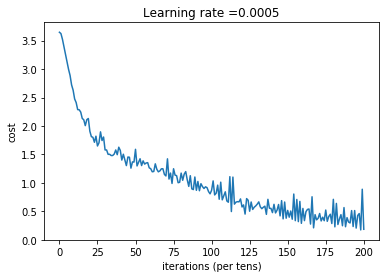

Parameters have been trained!
Train Accuracy :  0.955615
Test Accuracy  :  0.02936508
Learning_rate  :  0.0005
Batch Size     :  512
Instructions for updating:
Use tf.cast instead.


In [32]:
print(X_train.shape)
parameters,conf = model(X_train, Y_train, X_test, Y_test,num_epochs = 1001)
#24,20,2.14

In [18]:
def precision(label, confusion_matrix):
    col = confusion_matrix[:, label]
    return confusion_matrix[label, label] / col.sum()


In [20]:
def recall(label, confusion_matrix):
    row = confusion_matrix[label, :]
    return confusion_matrix[label, label] / row.sum()

In [22]:
def precision_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_precisions = 0
    for label in range(rows):
        sum_of_precisions += precision(label, confusion_matrix)
    return sum_of_precisions / rows


In [24]:
def recall_macro_average(confusion_matrix):
    rows, columns = confusion_matrix.shape
    sum_of_recalls = 0
    for label in range(columns):
        sum_of_recalls += recall(label, confusion_matrix)
    return sum_of_recalls / columns

# y_Actual = 
# df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
# confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

# sn.heatmap(confusion_matrix, annot=True)

In [36]:
sess = tf.Session()
with sess.as_default():
        print(sess.run(conf))

InvalidArgumentError: You must feed a value for placeholder tensor 'Y' with dtype float and shape [34,?]
	 [[node Y (defined at <ipython-input-31-58a4882e9e88>:29) ]]

Caused by op 'Y', defined at:
  File "/home/sayali/anaconda3/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sayali/anaconda3/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/sayali/anaconda3/lib/python3.7/asyncio/base_events.py", line 539, in run_forever
    self._run_once()
  File "/home/sayali/anaconda3/lib/python3.7/asyncio/base_events.py", line 1775, in _run_once
    handle._run()
  File "/home/sayali/anaconda3/lib/python3.7/asyncio/events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3185, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-09dcd1bee0ed>", line 2, in <module>
    parameters,conf = model(X_train, Y_train, X_test, Y_test,num_epochs = 1001)
  File "<ipython-input-31-58a4882e9e88>", line 29, in model
    X, Y = tf.placeholder(dtype = "float32", shape=(n_x, None) , name="X"), tf.placeholder(dtype = "float32", shape=(n_y,None) , name="Y")
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/gen_array_ops.py", line 5791, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tensorflow/python/util/deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 3300, in create_op
    op_def=op_def)
  File "/home/sayali/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Y' with dtype float and shape [34,?]
	 [[node Y (defined at <ipython-input-31-58a4882e9e88>:29) ]]
